# AAI 500 Final Project

Title:  Analyzing the CDC Diabetes Health Indicators Dataset to Understand Key Factors Influencing Diabetes Risk in the US

Group 6 Team:
* Iman Hamdan
* Andrew Blumhardt

Short Description of Your Project and Objectives: This project analyzes healthcare statistics and lifestyle survey information from the CDC Diabetes Health Indicators Dataset. The objective is to explore relationships between various factors, such as age, BMI, lifestyle habits, and diabetes status (healthy, pre-diabetic, diabetic). Key models and analyses include exploring how age and BMI influence diabetes prevalence, examining the impact of physical activity and smoking on diabetes risk, and investigating the interaction between mental health, physical health, and socioeconomic factors in predicting diabetes.

Name of Your Selected Dataset: CDC Diabetes Health Indicators Dataset

Description of Your Selected Dataset (data source, number of variables, size of dataset, etc.): 

This dataset, sourced from the UCI Machine Learning Repository, contains healthcare and lifestyle information related to diabetes diagnosis for individuals in the US. It has 35 features including demographics, lab results, and survey responses, and includes diabetes status as the target variable. The dataset size is approximately 70,000 records with a mixture of categorical and numerical variables. https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

The data includes 253680 records with 22 features. There are no missing values. 

Binary values iclude Diabetes_binary, HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, Sex (Generally 1 = yes, may stipulate daily, monthly for example exercise).

Demographics are sex, age, income, and education.

Intergers are BMI, GenHlth, MentHlth, PhysHlth, Age, Education, Income.

Health or Hlth is measured as scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor. Can also me number of times in the past 30 days like MentHlth.

Age is 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older.

Education level is 1 = never  through 6 = at least 4 years of college.

Income scale scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more.

In [ ]:
# Import CDC Diabetes Health Indicators located at https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
# Install the ucimlrepo package
%pip install ucimlrepo

# Restart Kernel after install
# Open the Command Palette (Ctrl + Shift + P on Windows/Linux, Cmd + Shift + P on macOS).
# Type "Restart Kernel" and select Jupyter: Restart Kernel.

In [1]:
# Verify ucimlrepo package
!pip show ucimlrepo

Name: ucimlrepo
Version: 0.0.7
Summary: Package to easily import datasets from the UC Irvine Machine Learning Repository into scripts and notebooks.
Home-page: https://github.com/uci-ml-repo/ucimlrepo
Author: Philip Truong
Author-email: Philip Truong <ucirepository@gmail.com>
License: 
Location: C:\Users\anblumha\AppData\Local\anaconda3\Lib\site-packages
Requires: certifi, pandas
Required-by: 


In [2]:
# Import modules used for prior assignments

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import warnings
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import t
from scipy.stats import beta
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.genmod.families.links import Identity

# Import the dataset into your code
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

In [11]:
# (OPTIONAL) run to print metadata & variable information 
print(cdc_diabetes_health_indicators.metadata) 
print(cdc_diabetes_health_indicators.variables) 

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [12]:
# Function to display scrollable describe output
def display_scrollable(data):
    html = f"""
    <div style="height:300px; overflow:auto; border:1px solid #ccc; padding:10px;">
        {data.to_html()}
    </div>
    """
    display(HTML(html))

# Call describe() for the entire dataframe and display it in a scrollable container
display_scrollable(X.describe())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Verify that the data is clean, no empty values. We might also remove some outliers later.

In [48]:
X.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

This setup will generate a series of plots for each of your data points, allowing for a comprehensive visual analysis in one notebook. If you have specific variables you want to compare against others in box plots or need adjustments in the visualization settings, feel free to customize the plotting function as needed.

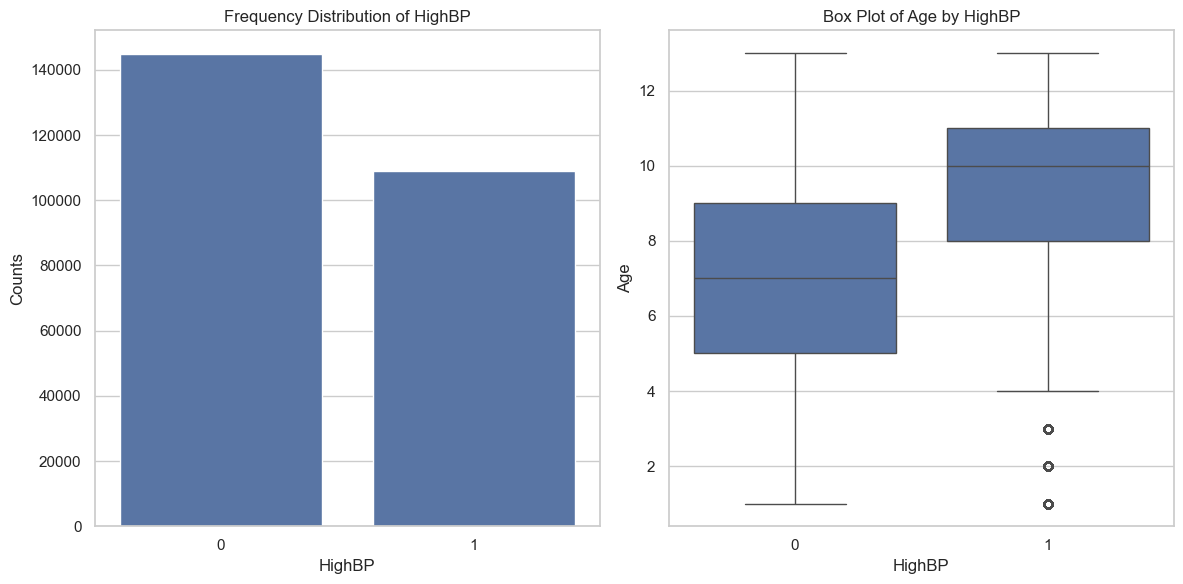

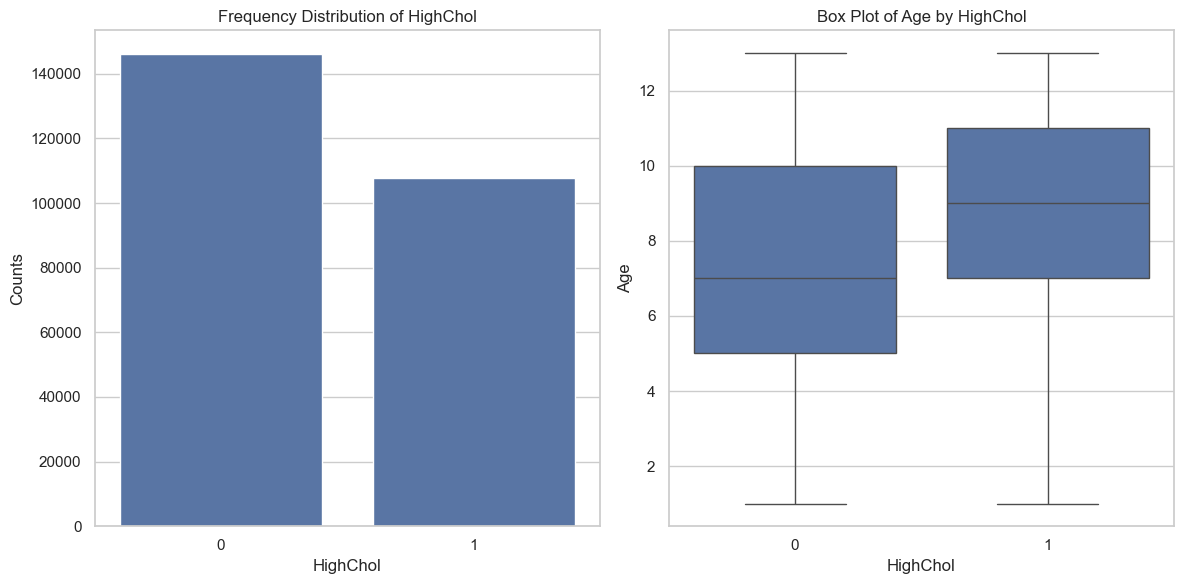

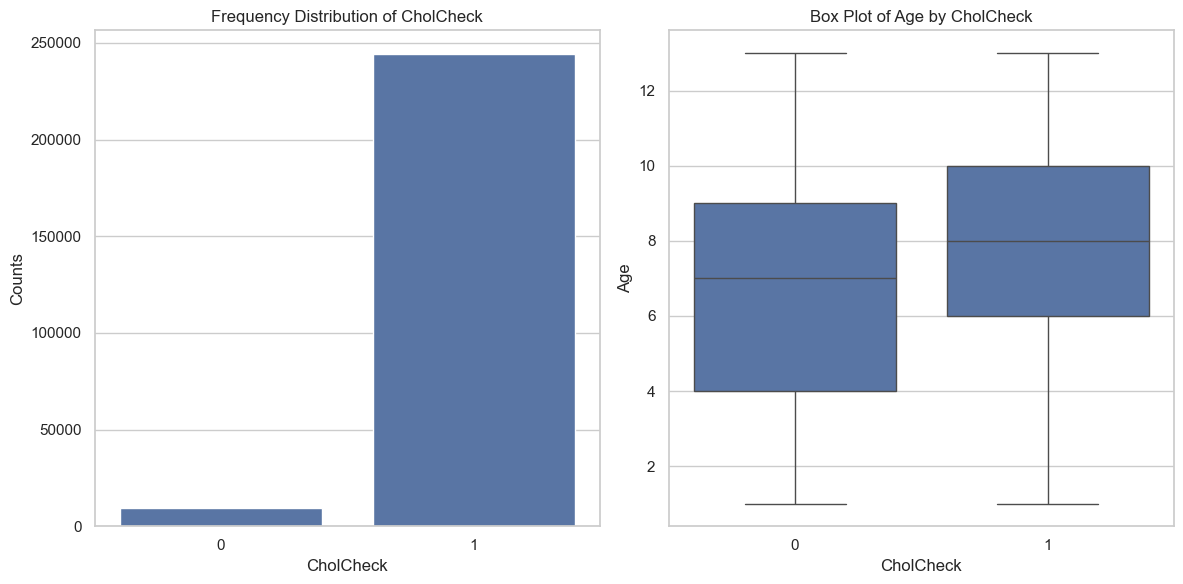

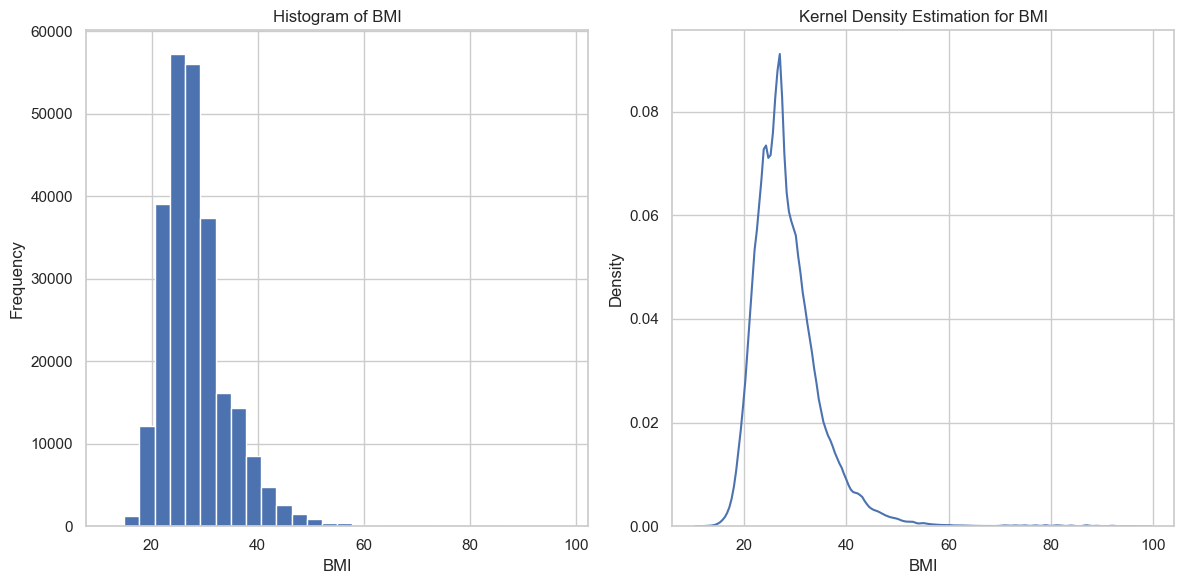

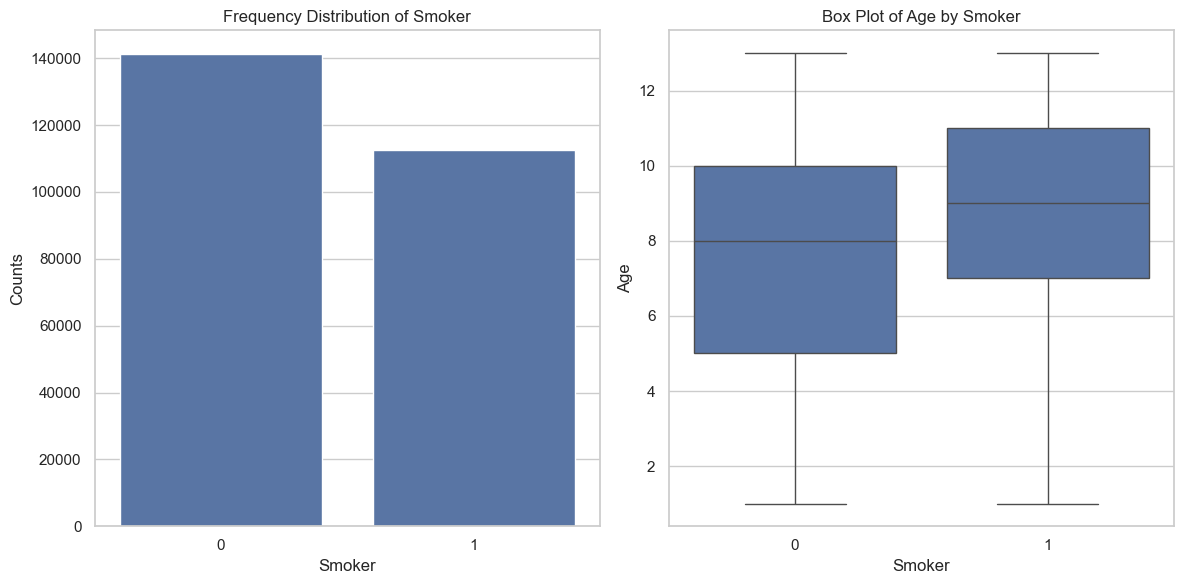

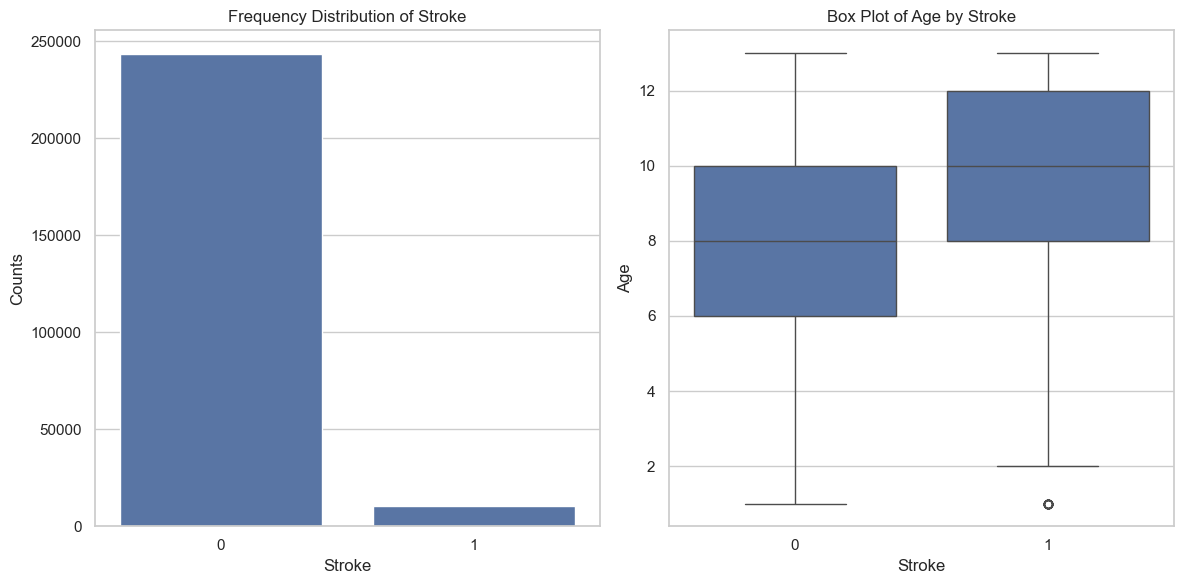

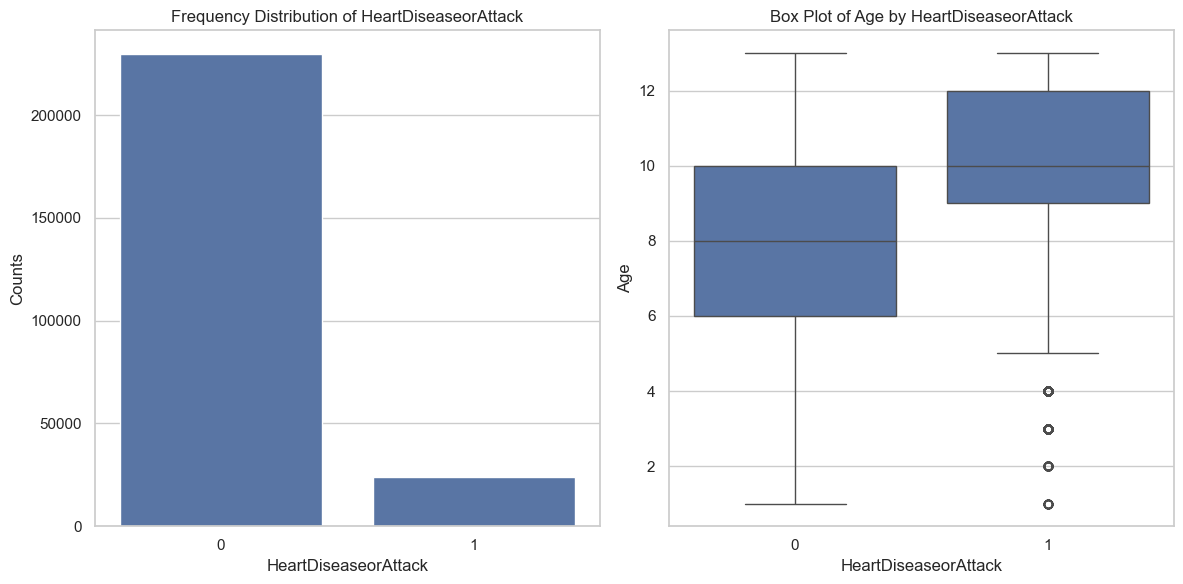

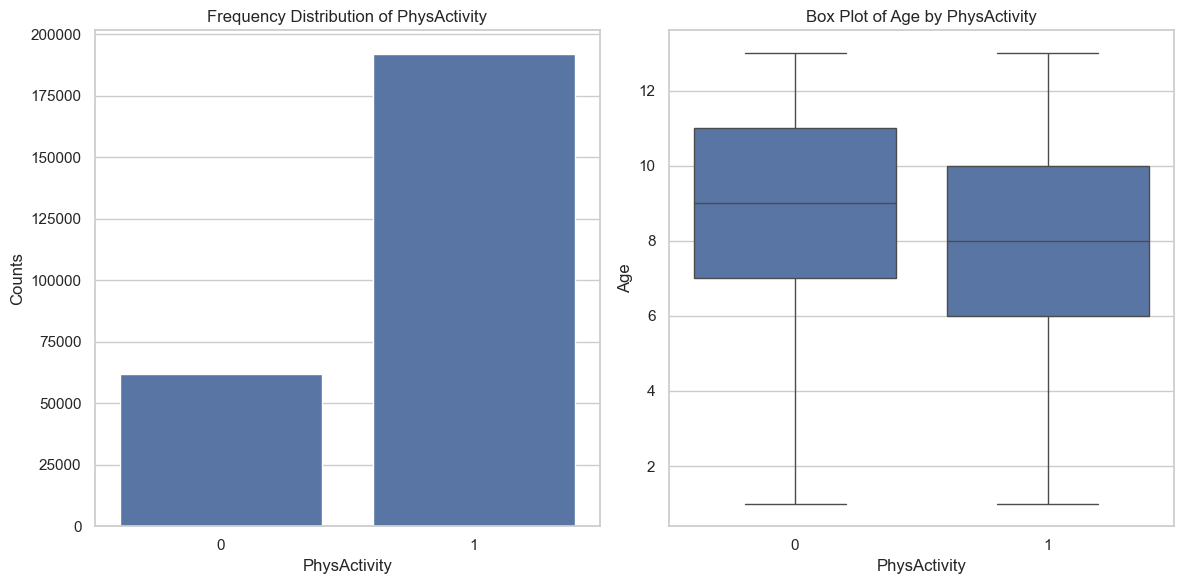

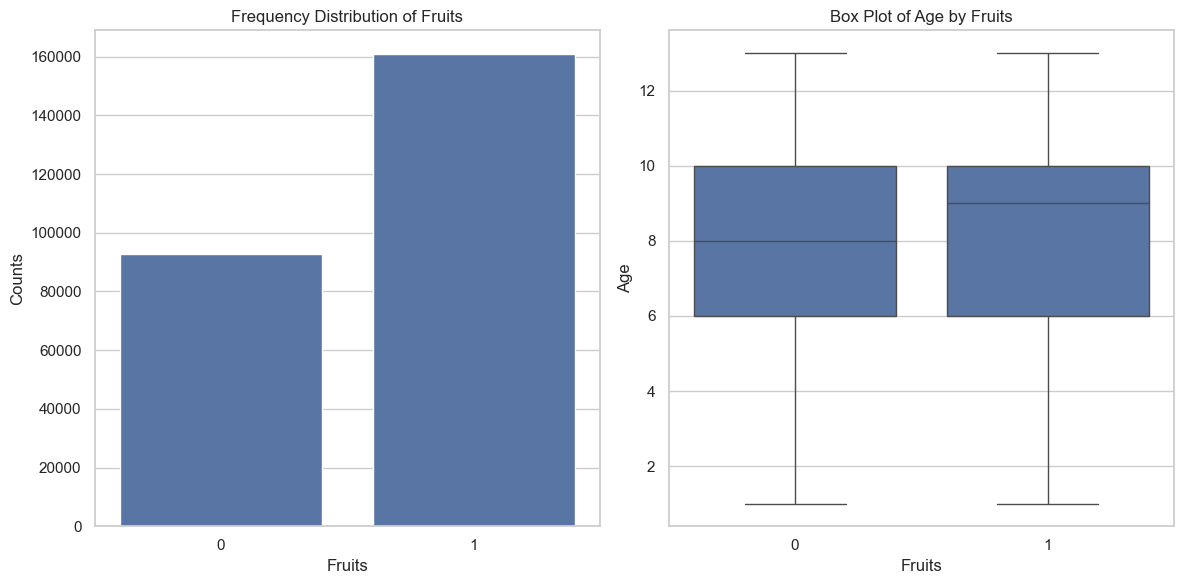

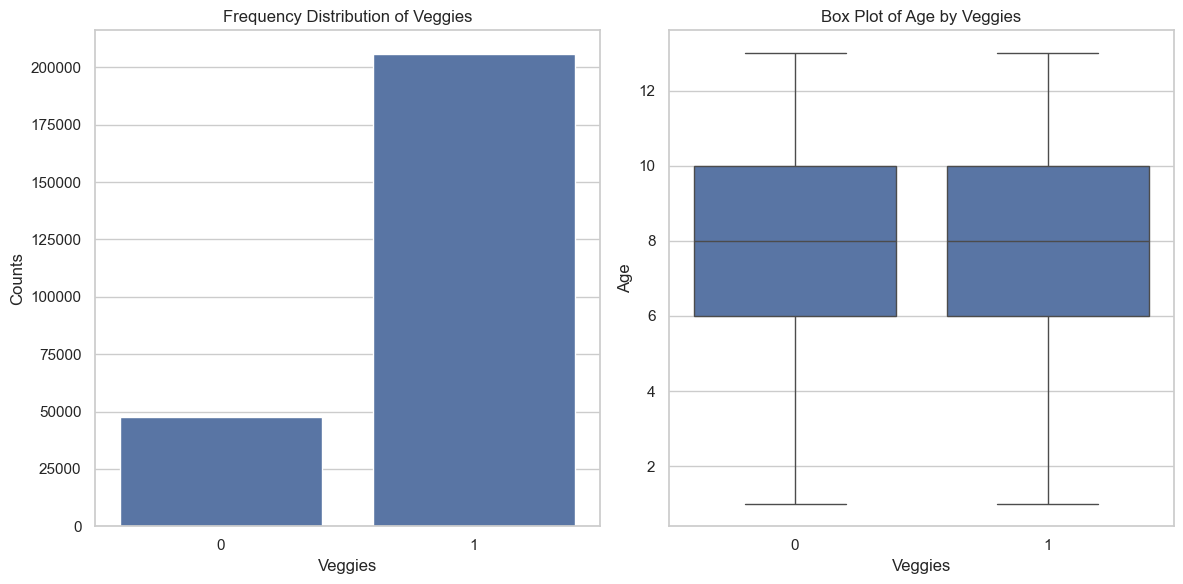

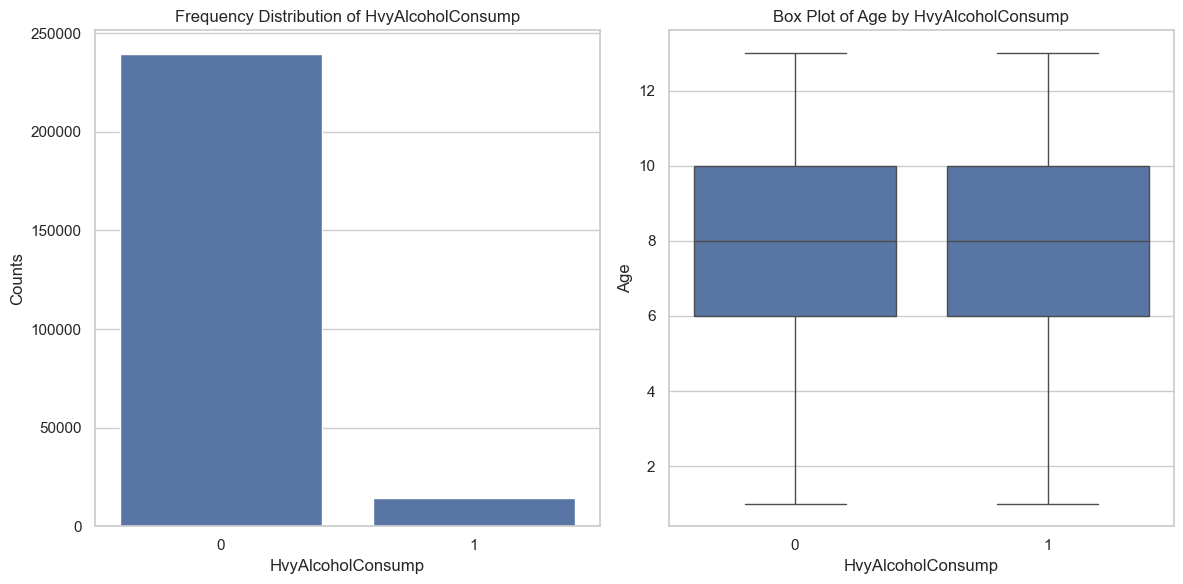

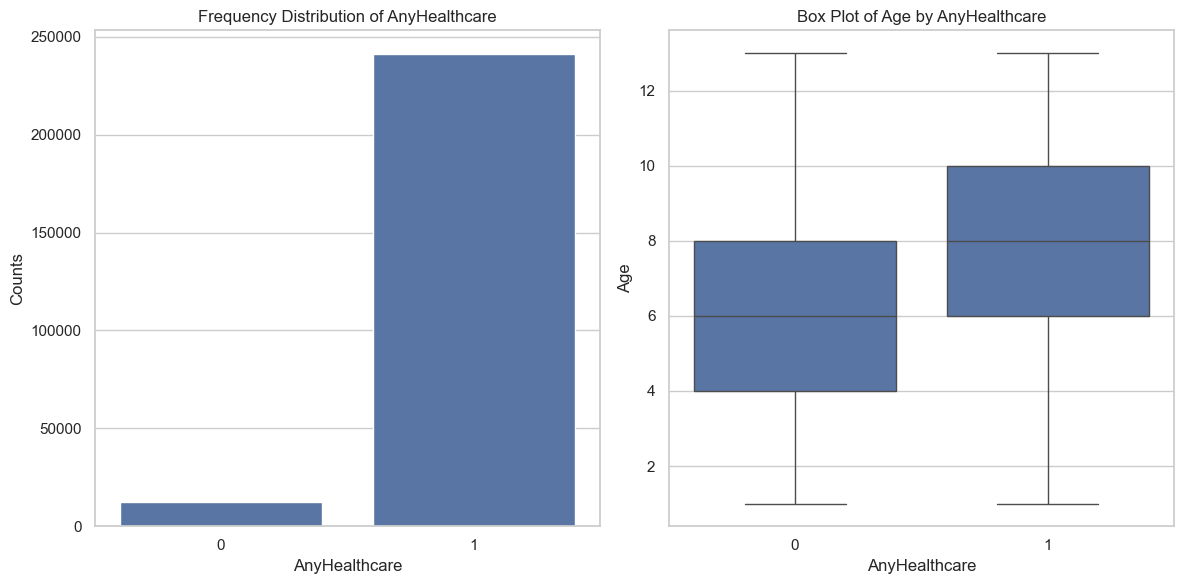

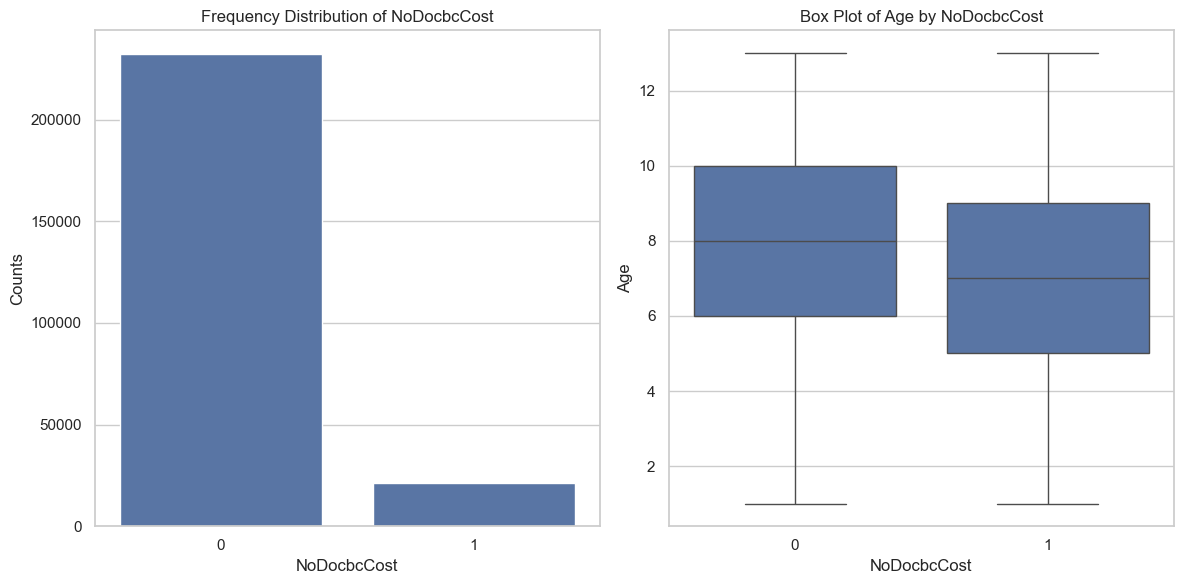

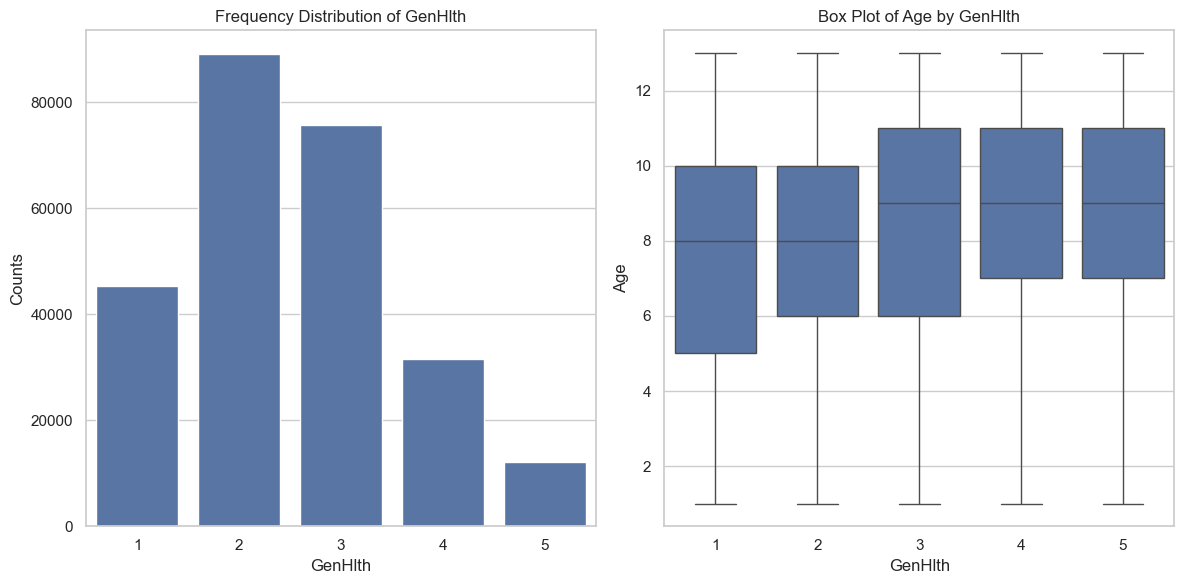

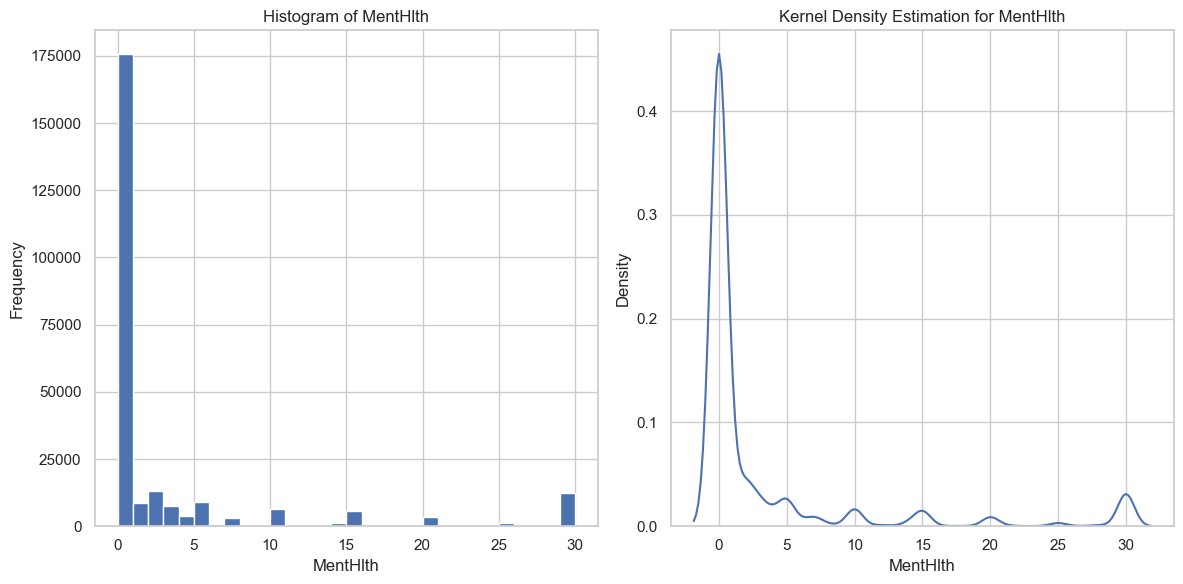

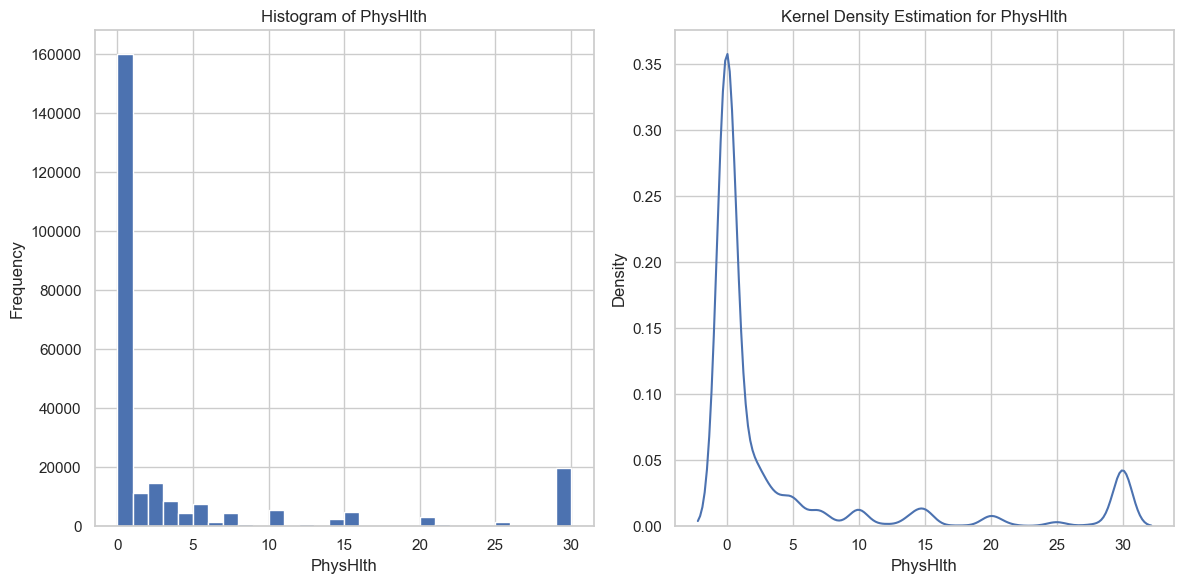

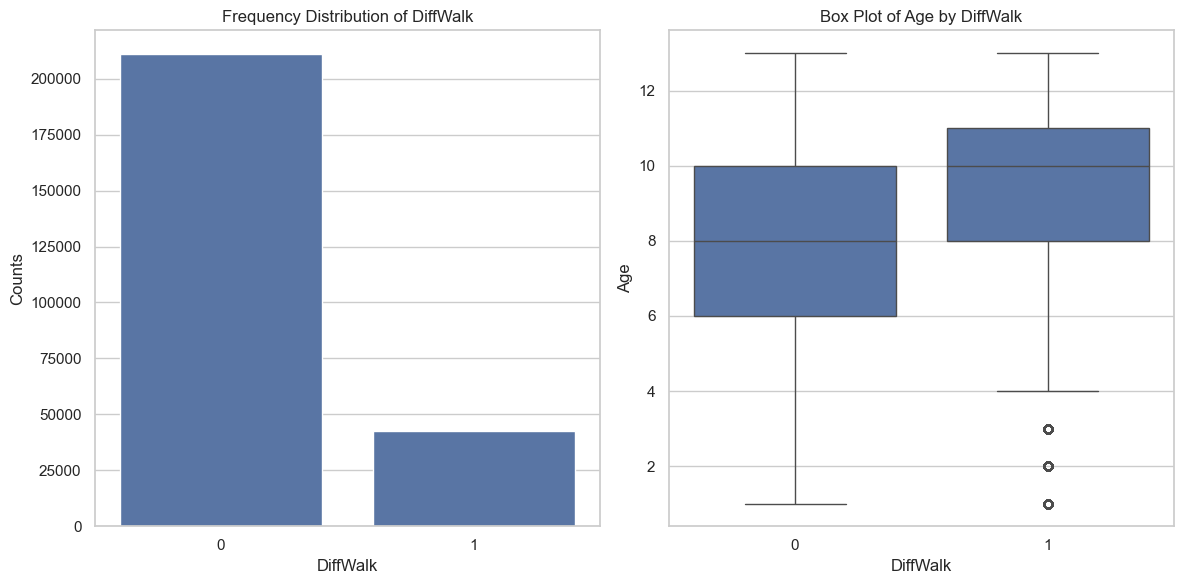

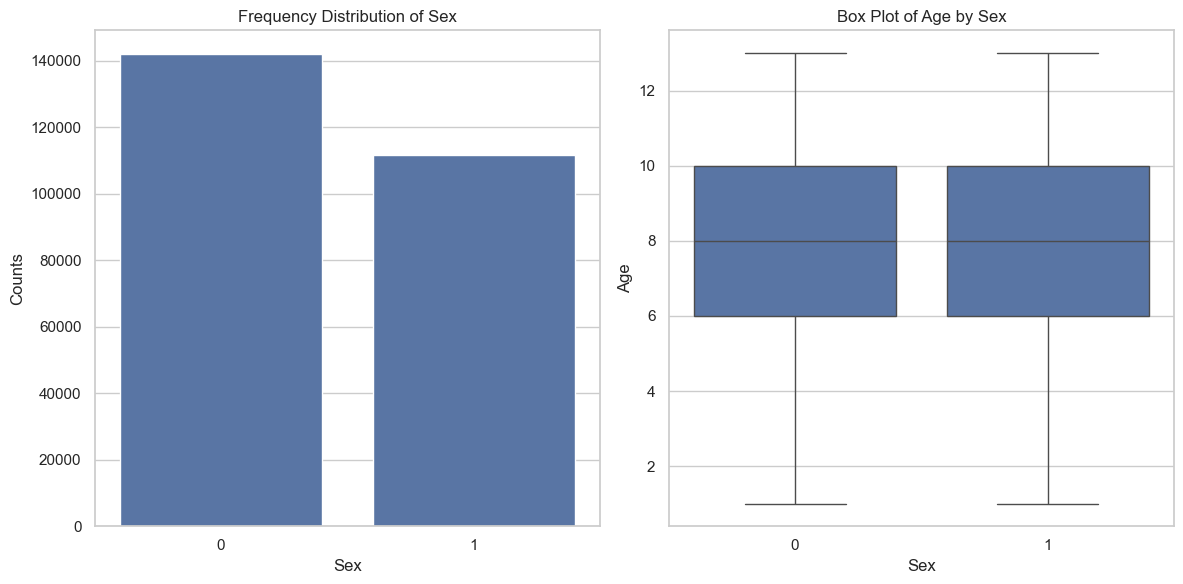

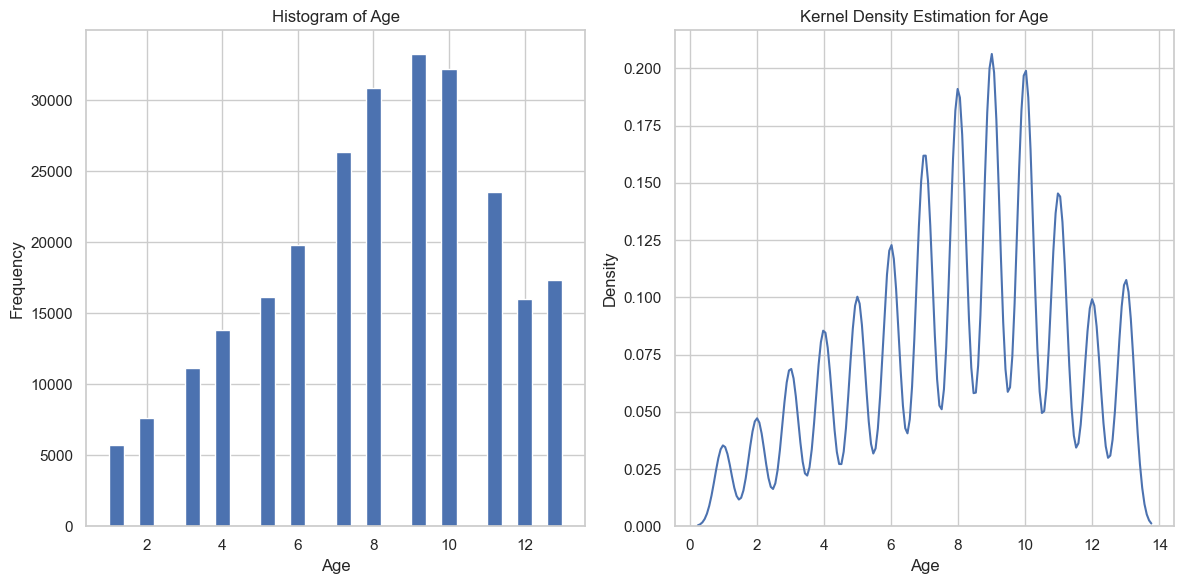

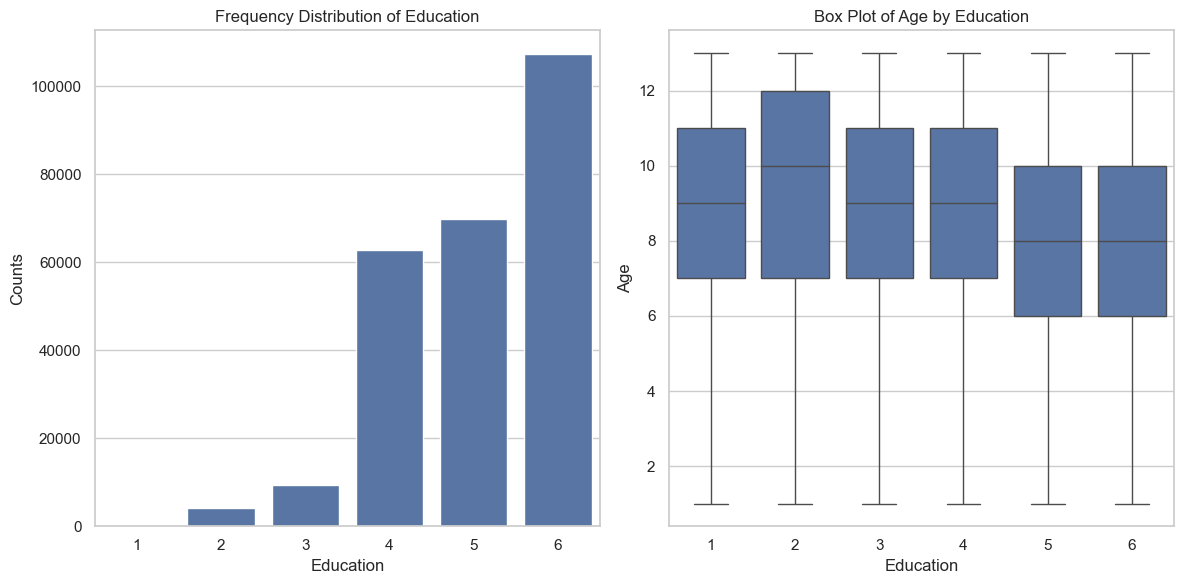

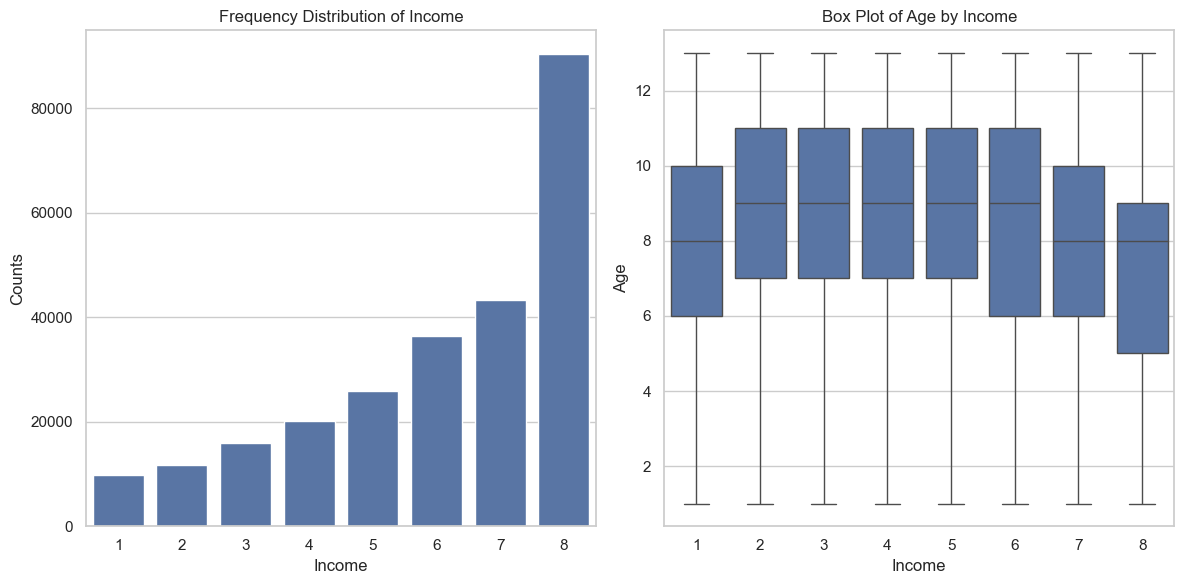

In [25]:
import seaborn as sns

# Setting aesthetics for seaborn plots
sns.set(style="whitegrid")

def plot_data_comparisons(df, column):
    # Check if the column is numeric or categorical
    if df[column].dtype == 'object' or len(df[column].unique()) < 10:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
        
        # Frequency Distribution
        sns.countplot(x=column, data=df, ax=ax1)
        ax1.set_title(f'Frequency Distribution of {column}')
        ax1.set_xlabel(column)
        ax1.set_ylabel('Counts')
        
        # Box Plot for each category vs. some continuous variable, adjust 'Age' as needed
        if 'Age' in df.columns:
            sns.boxplot(x=column, y='Age', data=df, ax=ax2)
            ax2.set_title(f'Box Plot of Age by {column}')
            ax2.set_ylabel('Age')
        else:
            ax2.set_title('No Age column found for Box Plot')
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
        
        # Histogram
        df[column].hist(bins=30, ax=ax1)
        ax1.set_title(f'Histogram of {column}')
        ax1.set_xlabel(column)
        ax1.set_ylabel('Frequency')
        
        # Kernel Density Estimation
        sns.kdeplot(df[column], ax=ax2)
        ax2.set_title(f'Kernel Density Estimation for {column}')
        ax2.set_xlabel(column)
        ax2.set_ylabel('Density')

    plt.tight_layout()
    plt.show()

# List all columns to be plotted, here we assume df.columns is appropriate
for col in X.columns:
    plot_data_comparisons(X, col)
